In [10]:
##### This code is from Updated Testing Reddit - No Con- bias (Fictitious Play)-01092022
##### This code replace the big real datanetwork with small sythetic network 
import scipy
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations
import time
import random
from scipy.stats import beta
import pandas as pd
import copy
%matplotlib inline
#%run pure_strategy_selection.ipynb  #include simple selection algorithm
import scipy.io
import collections
import sys


## Mathmatic Functions

In [11]:
# centers the opinion vector around 0\n",
def mean_center(op, n):
    ones = np.ones((n, 1))
    x = op - (np.dot(np.transpose(op),ones)/n) * ones
    return x
    
# compute number of edges, m\n
def num_edges(L, n):
    m = 0
    for i in range(n):
        for j in range(n):
            if i > j and L[i,j] < 0:
                m += 1            
    return m

# maximizing polarization only: \\bar{z}^T \\bar{z}   
def obj_polarization(A, L, op, n):
    op_mean = mean_center(op, n)
    z_mean = np.dot(A, op_mean) 
    return np.dot(np.transpose(z_mean), z_mean)[0,0] 

def obj_polarization_1(A, L, op, n):
    z = np.dot(A, op) 
    z_mean = mean_center(z, n)
    return np.dot(np.transpose(z_mean), z_mean)[0,0] 

# Calculate innate polarization
def obj_innate_polarization(s, n):  
#     np.set_printoptions(precision=5)
    op_mean = mean_center(s, n)
    return np.dot(np.transpose(op_mean), op_mean)[0,0]

In [12]:
# Parameters for the network

np.set_printoptions(precision=3)

## Creating Network
### 1. Make Random Network

In [13]:
# name = "Karate"
# filename = "%s.ipynb" % name
# print(filename)
# %run filename
%run Karate.ipynb
#%run Twitter.ipynb
#%run Reddit.ipynb

There are 34 agents
[[0. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 0. 1. 1.]
 [0. 0. 1. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]]


In [14]:
agent = 481
network_anl(s,n,G,agent)

IndexError: index 481 is out of bounds for axis 0 with size 34

34


<Figure size 1440x1440 with 0 Axes>

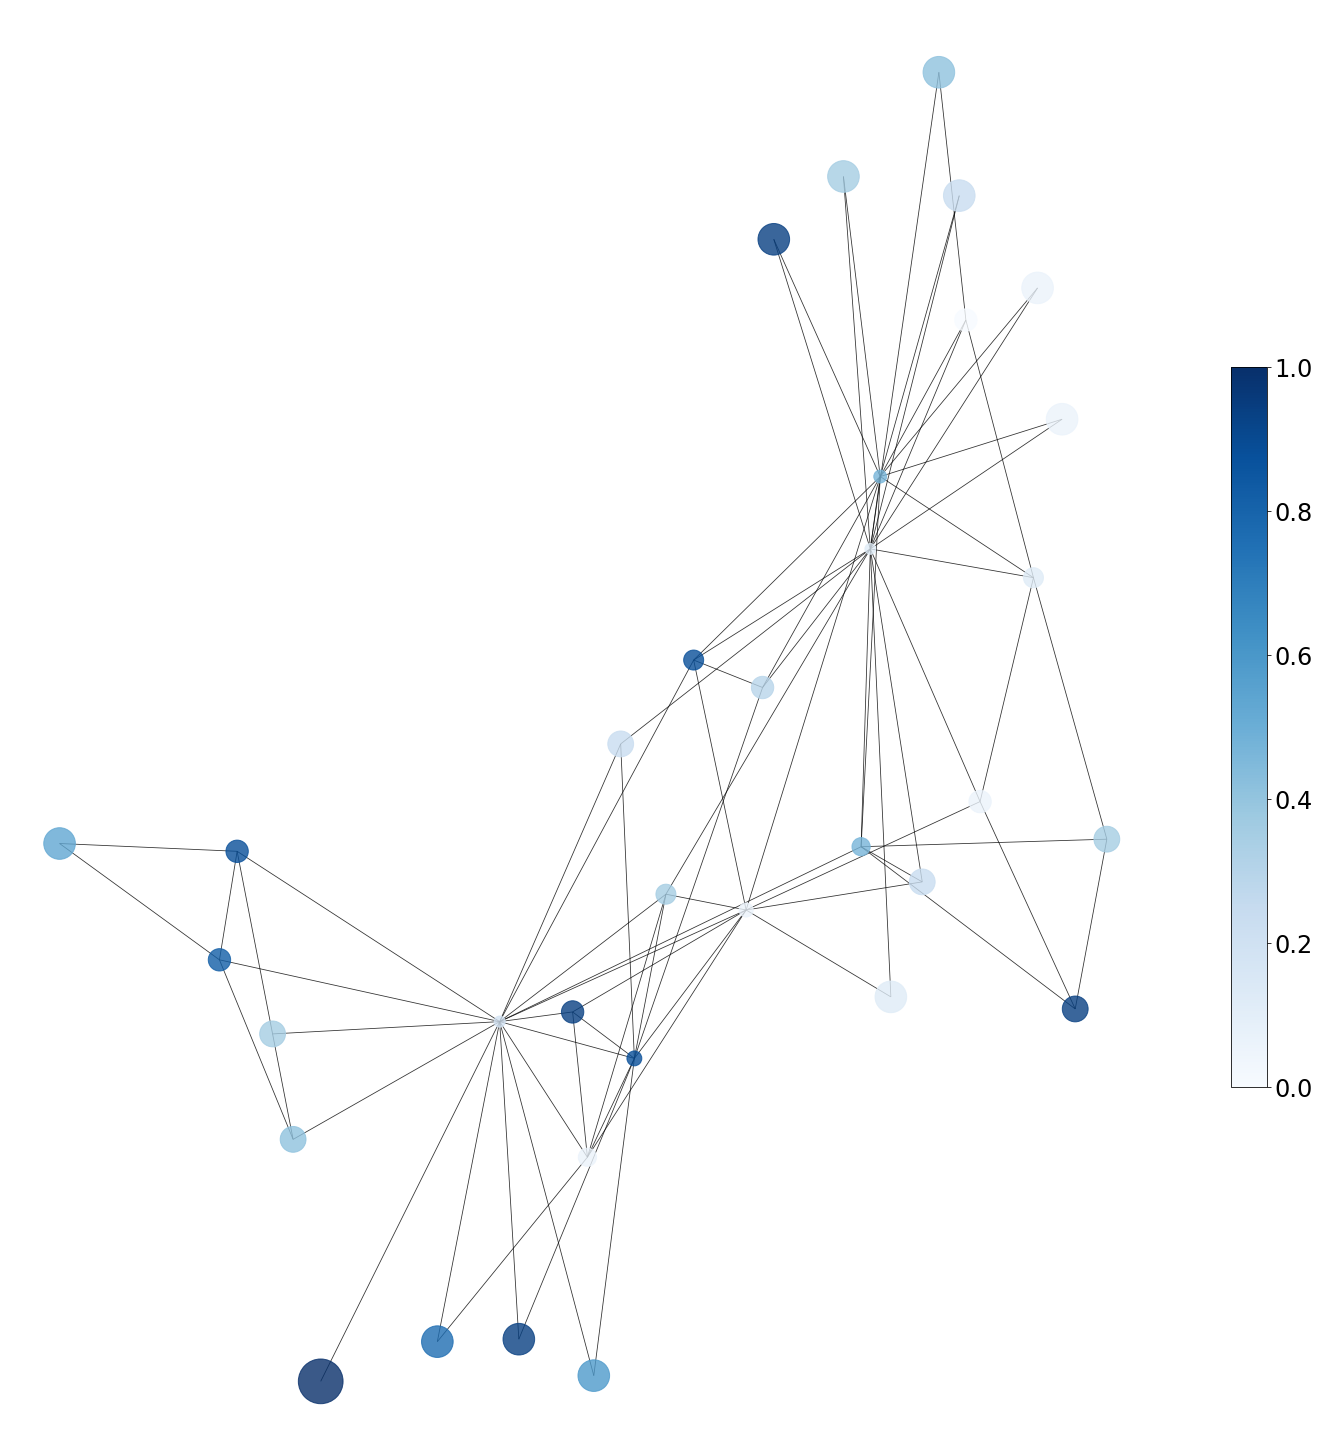

In [24]:
# what the twitter graph looks like 
s_use = s.flatten()   # Convert array to a list for later operation
s_use = s_use.tolist()
new_s = [i * 30 for i in s_use]
df = pd.DataFrame(new_s, columns=['Opinion']) #create a datafram with index at column 1, opinion at column 2

nxG = nx.from_numpy_matrix(G)   
# nxG = nx.relabel_nodes(nxG, mapping)      
plt.figure(figsize=(20, 20))


def node_edge(G, n):
    edges =[]
    for v in range(n):
        a = np.array(np.nonzero(G[v])[0])
        edge = len(a)
#         print(edge)
        edges.append(edge)
        
    return edges

node_edges = node_edge(G, n)
# print(node_edges)

node_sizes =[]
for i in node_edges:
    node_size = 1/i*2000
    node_sizes.append(node_size)

min_equi = [202,351,490]
max_equi = [199,529,37]
# Create node color
color_map = []
for node in nxG:
    if node in min_equi:
        color_map.append('orange')
    elif node in max_equi:
        color_map.append('red')
    else:
        color_map.append('grey')
# print(node_sizes)

######################### Calculate Key Values & Visualization #######################################3
L = scipy.sparse.csgraph.laplacian(G, normed=False)  # Return the Laplacian matrix
A = np.linalg.inv(np.identity(n) + L)  # A = (I + L)^(-1)\n  Stanford paper theory
m = num_edges(L, n)                    # call the function to calculate the number of edges
columnsum_ij = np.sum(A, axis=0)
#print(columnsum_ij)
print(n)
# what the twitter graph looks like 
nxG = nx.from_numpy_matrix(G)          
plt.figure(figsize=(20, 20))

# Fix seed - fix network shape
my_pos = nx.spring_layout(nxG, seed = 2)
nx.draw(nxG, pos= my_pos, with_labels= False, node_color=df['Opinion'].astype(int),cmap=plt.cm.Blues, node_size= node_sizes, edge_color='black', width=0.8, font_color='black',font_size=26, font_weight='bold', alpha=0.8)
#nx.draw(nxG, pos = my_pos, with_labels=False, node_color=color_map, node_size= node_sizes, edge_color='grey', width=0.5, font_color='white',font_size=9, font_weight='bold')
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin = 0, vmax=1))
cbar = plt.colorbar(sm, shrink = 0.5)
tick_font_size = 24
cbar.ax.tick_params(labelsize=tick_font_size)
plt.show()

# if we want to customize the color bar range to min/max s
# vmin = min(s)
# vmax = max(s)
# sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin = vmin, vmax=vmax))
# sm._A = []
# plt.colorbar(sm,shrink=0.5)
# plt.show()

### Min [245, ] [284, ]       Max [50, ] [481, ] 

## Network Analysis

In [25]:
# Checking Selected node proprties, no need to run for simulation.

def node_edge(G, n):
    edges =[]
    for v in range(n):
        a = np.array(np.nonzero(G[v])[0])
        edge = len(a)
#         print(edge)
        edges.append(edge)
        
    return edges

edges = node_edge(G, n)
print('Edge Properties')
print('Max:'+ str(np.max(edges)))
print('Mean: ' + str(np.mean(edges)))
print('Min: ' + str(np.min(edges)))

min_equi = [245,284]
max_equi = [50,481]


print('Min Choice')
print('11'+ str(s[11]))
print(np.nonzero(G[11]))
# print('   edge:'+ str(edges[199]))

print('16'+ str(s[16]))
print(np.nonzero(G[16]))
# print('   edge:'+ str(edges[37]))


print('12'+ str(s[12]))
print(np.nonzero(G[12]))
# print('   edge:'+ str(edges[529]))

print('Max Choice')
print('15'+ str(s[15]))
print(np.nonzero(G[15]))
# print('   edge:'+ str(edges[202]))


Edge Properties
Max:17
Mean: 4.588235294117647
Min: 1
Min Choice
11[0.77]
(array([0], dtype=int64), array([0], dtype=int64))
16[0.512]
(array([0, 0], dtype=int64), array([5, 6], dtype=int64))
12[0.64]
(array([0, 0], dtype=int64), array([0, 3], dtype=int64))
Max Choice
15[0.423]
(array([0, 0], dtype=int64), array([32, 33], dtype=int64))


In [26]:
print("___________________Min Analyze__________________________________________")
print(np.argmax(s))
print(np.argmin(s))

s_aa = s[:, 0]
my_dict = {index: value for index, value in enumerate(s_aa)}
sorting_s = sorted(my_dict.items(), key=lambda x:x[1])
sorted_S = dict(sorting_s)
print(sorted_S)
search_key = 86

temp = list(sorted_S.items()) 
res = [idx for idx, key in enumerate(temp) if key[0]==search_key]
# printing result 
print("Opinion rank of this agent is : " + str(res))


___________________Min Analyze__________________________________________
11
29
{29: 0.2065732769497216, 20: 0.2378355132396121, 27: 0.2457746750273635, 3: 0.25481067581322, 22: 0.2563547092455989, 2: 0.2569361098653809, 23: 0.2708565670154095, 33: 0.2916447236743404, 9: 0.292990277226838, 0: 0.3329855890252891, 28: 0.3401210877868077, 18: 0.3518122646975705, 19: 0.3657317039639005, 30: 0.3843924362005658, 4: 0.4010312931106546, 13: 0.4016676996257509, 25: 0.4227628714480405, 15: 0.4228007697613097, 10: 0.4374543270176704, 26: 0.4449042104919422, 32: 0.4877651933335371, 31: 0.4967505699320694, 16: 0.5120312044870241, 21: 0.5592090235429361, 12: 0.640120610637489, 5: 0.6946240837167924, 8: 0.7067782468063173, 6: 0.720404905537744, 1: 0.7292162342929378, 24: 0.7375304885380007, 7: 0.7377757624061752, 17: 0.7550029202077742, 14: 0.763982714954492, 11: 0.7704062562620455}
Opinion rank of this agent is : []


In [27]:
print(s[11])
print(s[16])
print(s[6])
print(s[29])

[0.77]
[0.512]
[0.72]
[0.207]


In [28]:
agent=40

In [29]:
print("___________________Max Analyze__________________________________________")
nxG = nx.from_numpy_matrix(G) 
# G = nx.karate_club_graph()
print("_______________Degree Centrality_____________________________")  
plt.figure(figsize =(15, 15))
deg_centrality = nx.degree_centrality(nxG)
sortedDict = sorted(deg_centrality.items(), key=lambda x:x[1])
converted_dict = dict(sortedDict)
print(converted_dict)
print("                           ")
print("_______________Closeness Rank_____________________________")
close_centrality = nx.closeness_centrality(nxG)
sortedDict1 = sorted(close_centrality.items(), key=lambda x:x[1])
converted_dict1 = dict(sortedDict1)
print(converted_dict1)
print("                           ")
print("_______________Page Rank_____________________________")
pr = nx.eigenvector_centrality(nxG)
sortedDict3 = sorted(pr.items(), key=lambda x:x[1])
converted_dict3 = dict(sortedDict3)
print(converted_dict3)

print("                           ")

def gap(op, n):
    ones = np.ones((n, 1))
    x = op - (np.dot(np.transpose(op),ones)/n) * ones
    return abs(x)

gap = gap(s,n)
my_gap = {index: value for index, value in enumerate(gap)}
sorting_gap = sorted(my_gap.items(), key=lambda x:x[1])
sorted_gap = dict(sorting_gap)
print(sorted_gap)



___________________Max Analyze__________________________________________
_______________Degree Centrality_____________________________
{11: 0.030303030303030304, 9: 0.06060606060606061, 12: 0.06060606060606061, 14: 0.06060606060606061, 15: 0.06060606060606061, 16: 0.06060606060606061, 17: 0.06060606060606061, 18: 0.06060606060606061, 20: 0.06060606060606061, 21: 0.06060606060606061, 22: 0.06060606060606061, 26: 0.06060606060606061, 4: 0.09090909090909091, 10: 0.09090909090909091, 19: 0.09090909090909091, 24: 0.09090909090909091, 25: 0.09090909090909091, 28: 0.09090909090909091, 5: 0.12121212121212122, 6: 0.12121212121212122, 7: 0.12121212121212122, 27: 0.12121212121212122, 29: 0.12121212121212122, 30: 0.12121212121212122, 8: 0.15151515151515152, 13: 0.15151515151515152, 23: 0.15151515151515152, 3: 0.18181818181818182, 31: 0.18181818181818182, 1: 0.2727272727272727, 2: 0.30303030303030304, 32: 0.36363636363636365, 0: 0.48484848484848486, 33: 0.5151515151515151}
                         

<Figure size 1080x1080 with 0 Axes>

### 4. Equilibrium & Polarization  - based on derivation
$$P(z) = z ^T * z $$


In [30]:

## s =  make_innat_opinions(n, c1)
# print('Innate Opinion')
# print(s)
# print('Equilibrium Opinion')
# print(np.dot(A, s))

op = s
y = mean_center(s,n)
# print(y)
innat_pol = np.dot(np.transpose(y), y)[0,0] 
print('Innate_polarization:')
print(innat_pol)

# Test equilibrium polarization
equ_pol = obj_polarization(A, L, s, n)
print('Equi_polarization:')
print(equ_pol)

di = equ_pol-innat_pol
print("Difference:")
print(di)

Innate_polarization:
1.1743186020487546
Equi_polarization:
0.15967526924290512
Difference:
-1.0146433328058495


In [31]:
payoff_matrix = [np.empty((0, 2*n), float)]
print(payoff_matrix)
print(np.zeros(2*n).shape)

[array([], shape=(0, 68), dtype=float64)]
(68,)


### Testing players' behavior

In [32]:
def make_payoff_row(op1,v2, A, L, n):
    payoff_row = np.zeros(2*n)

    for column in range(2*n):
#         print(column)
        v1 = int(column/2)  #i.e., column 11 is agent 5, opinion 1
        max_opinion = column%2
#         print(v1, max_opinion)
        # update the maximizer's change to the opinion array that has changed by minimizer(op1)
        op2 = copy.copy(op1)
        op2[v1,0] = max_opinion
        # calculate the polarization with both max and min's action
        payoff_row[column] = obj_polarization(A, L, op2, n)
    
    j_1 = 2*v2 + 0
    j_2 = 2*v2 + 1
    payoff_row[j_1] = 100
    payoff_row[j_2] = 100
    
    return payoff_row

def make_payoff_matrix(s,n):
    payoff_matrix = np.empty((0, 2*n), float)
    C1 = list(range(n))    # for all agent 
    for v2 in C1:         
            print('Minimizer start from agent'+str(v2))
            min_opi_option = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] #Min has two options to change agent v2's opinion
            for min_op in min_opi_option:
                     op = copy.copy(s)
                     op[v2] = min_op
                     payoff_row = make_payoff_row(op,v2, A, L, n) 
                     print(payoff_row)
                     payoff_matrix = np.vstack([payoff_matrix, payoff_row])
    return payoff_matrix

In [33]:
payoff_matrix = make_payoff_matrix(s,n)
pd.DataFrame(payoff_matrix).to_csv('Karate Discrete Payoff Matrix1.csv')
# pd.DataFrame(payoff_matrix).to_csv('Reddit Discrete Payoff Matrix1.csv')
#pd.DataFrame(payoff_matrix).to_csv('Twitter Discrete Payoff Matrix1.csv')

Minimizer start from agent0
[100.    100.      0.133   0.153   0.148   0.139   0.14    0.178   0.135
   0.216   0.115   0.182   0.116   0.178   0.143   0.157   0.167   0.143
   0.176   0.147   0.134   0.211   0.153   0.199   0.157   0.182   0.149
   0.155   0.204   0.153   0.191   0.147   0.13    0.244   0.136   0.176
   0.186   0.143   0.154   0.166   0.175   0.135   0.149   0.193   0.177
   0.136   0.166   0.114   0.202   0.149   0.175   0.156   0.207   0.139
   0.16    0.133   0.168   0.142   0.164   0.111   0.16    0.146   0.163
   0.139   0.173   0.12    0.16    0.11 ]
[100.    100.      0.137   0.158   0.153   0.144   0.145   0.184   0.138
   0.222   0.119   0.188   0.119   0.184   0.147   0.162   0.172   0.148
   0.181   0.151   0.138   0.217   0.155   0.204   0.16    0.188   0.153
   0.16    0.21    0.157   0.197   0.151   0.134   0.25    0.139   0.181
   0.191   0.146   0.159   0.172   0.18    0.138   0.152   0.199   0.182
   0.139   0.171   0.118   0.208   0.153   0.181   0.1

   0.164   0.205   0.144   0.19    0.133]
Minimizer start from agent2
[  0.148   0.205   0.153   0.175 100.    100.      0.162   0.201   0.151
   0.245   0.129   0.207   0.128   0.203   0.165   0.178   0.191   0.163
   0.201   0.161   0.15    0.239   0.164   0.223   0.173   0.206   0.171
   0.176   0.23    0.173   0.215   0.165   0.146   0.271   0.152   0.199
   0.209   0.161   0.175   0.19    0.197   0.152   0.166   0.218   0.2
   0.153   0.189   0.131   0.227   0.169   0.199   0.175   0.231   0.158
   0.183   0.149   0.192   0.158   0.187   0.128   0.183   0.165   0.186
   0.159   0.197   0.139   0.183   0.128]
[  0.146   0.203   0.151   0.173 100.    100.      0.159   0.2     0.149
   0.242   0.128   0.205   0.128   0.201   0.161   0.177   0.188   0.162
   0.198   0.161   0.149   0.236   0.163   0.221   0.171   0.204   0.168
   0.175   0.228   0.171   0.213   0.163   0.145   0.268   0.15    0.197
   0.207   0.158   0.172   0.188   0.195   0.149   0.164   0.216   0.198
   0.151   0.1

   0.147   0.174   0.128   0.162   0.119]
[  0.134   0.183   0.134   0.159   0.151   0.148   0.143   0.187 100.
 100.      0.13    0.182   0.137   0.177   0.143   0.163   0.169   0.149
   0.179   0.155   0.15    0.201   0.151   0.205   0.157   0.189   0.152
   0.163   0.206   0.158   0.194   0.154   0.143   0.241   0.136   0.182
   0.189   0.15    0.157   0.174   0.178   0.142   0.15    0.201   0.18
   0.143   0.17    0.122   0.204   0.154   0.178   0.163   0.21    0.146
   0.164   0.141   0.171   0.149   0.168   0.119   0.163   0.153   0.166
   0.146   0.176   0.127   0.163   0.117]
[  0.135   0.187   0.136   0.161   0.154   0.149   0.146   0.189 100.
 100.      0.127   0.187   0.131   0.181   0.146   0.165   0.172   0.15
   0.182   0.155   0.147   0.21    0.153   0.207   0.158   0.191   0.154
   0.164   0.211   0.159   0.198   0.154   0.141   0.246   0.138   0.184
   0.192   0.15    0.159   0.176   0.181   0.141   0.151   0.203   0.183
   0.143   0.173   0.121   0.208   0.155   0.182

   0.192   0.239   0.17    0.222   0.158]
Minimizer start from agent6
[  0.116   0.157   0.11    0.139   0.128   0.132   0.122   0.169   0.144
   0.161   0.151   0.143 100.    100.      0.12    0.143   0.141   0.13
   0.154   0.143   0.138   0.169   0.131   0.184   0.135   0.169   0.129
   0.145   0.173   0.141   0.167   0.142   0.17    0.174   0.114   0.161
   0.162   0.14    0.134   0.157   0.154   0.133   0.128   0.18    0.155
   0.134   0.144   0.112   0.171   0.137   0.151   0.151   0.182   0.134
   0.139   0.131   0.146   0.137   0.144   0.111   0.137   0.14    0.139
   0.131   0.148   0.113   0.138   0.106]
[  0.114   0.157   0.109   0.138   0.128   0.13    0.121   0.167   0.139
   0.167   0.143   0.145 100.    100.      0.12    0.142   0.142   0.129
   0.154   0.14    0.133   0.173   0.129   0.183   0.134   0.168   0.128
   0.143   0.175   0.139   0.167   0.139   0.161   0.181   0.113   0.16
   0.163   0.136   0.133   0.155   0.154   0.129   0.127   0.179   0.155
   0.131   0.1

   0.168   0.21    0.147   0.194   0.136]
Minimizer start from agent8
[  0.167   0.226   0.172   0.195   0.191   0.176   0.18    0.224   0.167
   0.27    0.142   0.23    0.141   0.226   0.18    0.2   100.    100.
   0.219   0.183   0.166   0.264   0.178   0.245   0.189   0.228   0.19
   0.197   0.253   0.191   0.237   0.182   0.159   0.297   0.168   0.22
   0.231   0.177   0.194   0.21    0.218   0.167   0.183   0.24    0.22
   0.169   0.209   0.15    0.242   0.19    0.217   0.197   0.251   0.177
   0.202   0.171   0.211   0.18    0.207   0.146   0.21    0.172   0.205
   0.179   0.221   0.154   0.204   0.143]
[  0.162   0.221   0.166   0.189   0.185   0.171   0.174   0.218   0.163
   0.263   0.138   0.224   0.137   0.219   0.175   0.194 100.    100.
   0.214   0.178   0.162   0.257   0.173   0.239   0.184   0.223   0.184
   0.192   0.248   0.186   0.231   0.177   0.155   0.29    0.163   0.214
   0.225   0.172   0.188   0.204   0.213   0.162   0.178   0.234   0.215
   0.164   0.204   0.

[  0.147   0.196   0.15    0.171   0.161   0.171   0.157   0.198   0.157
   0.227   0.143   0.196   0.143   0.192   0.158   0.176   0.183   0.161
 100.    100.      0.157   0.222   0.177   0.214   0.176   0.198   0.165
   0.175   0.227   0.169   0.212   0.161   0.158   0.252   0.157   0.192
   0.206   0.156   0.172   0.183   0.194   0.146   0.169   0.209   0.196
   0.148   0.186   0.126   0.23    0.163   0.199   0.165   0.229   0.152
   0.178   0.149   0.185   0.161   0.184   0.123   0.178   0.162   0.184
   0.154   0.193   0.136   0.176   0.131]
Minimizer start from agent10
[  0.134   0.18    0.133   0.159   0.15    0.149   0.143   0.187   0.155
   0.196   0.145   0.175   0.138   0.175   0.143   0.163   0.166   0.149
   0.178   0.157 100.    100.      0.151   0.204   0.156   0.189   0.151
   0.163   0.202   0.159   0.192   0.156   0.148   0.235   0.136   0.181
   0.187   0.153   0.156   0.174   0.177   0.145   0.149   0.2     0.178
   0.146   0.168   0.124   0.2     0.155   0.176   0.

   0.16    0.199   0.14    0.184   0.129]
[  0.171   0.233   0.176   0.2     0.194   0.185   0.185   0.229   0.177
   0.268   0.156   0.231   0.156   0.227   0.185   0.205   0.215   0.188
   0.224   0.188   0.176   0.263 100.    100.      0.197   0.232   0.194
   0.203   0.259   0.196   0.243   0.186   0.174   0.293   0.176   0.224
   0.236   0.182   0.199   0.214   0.224   0.171   0.19    0.243   0.226
   0.173   0.215   0.152   0.256   0.192   0.226   0.196   0.259   0.178
   0.208   0.172   0.217   0.183   0.213   0.148   0.208   0.189   0.212
   0.183   0.224   0.161   0.208   0.15 ]
[  0.199   0.264   0.205   0.229   0.223   0.213   0.214   0.257   0.205
   0.297   0.184   0.26    0.184   0.256   0.214   0.233   0.245   0.217
   0.254   0.214   0.204   0.292 100.    100.      0.225   0.26    0.223
   0.231   0.291   0.224   0.273   0.213   0.203   0.321   0.204   0.253
   0.266   0.208   0.228   0.243   0.253   0.197   0.219   0.272   0.255
   0.199   0.245   0.178   0.287   0.22 

[  0.143   0.201   0.147   0.171   0.164   0.157   0.156   0.199   0.148
   0.238   0.127   0.201   0.127   0.197   0.156   0.175   0.184   0.159
   0.194   0.161   0.147   0.233   0.161   0.218   0.168   0.202 100.
 100.      0.226   0.168   0.211   0.16    0.144   0.264   0.147   0.194
   0.205   0.155   0.17    0.185   0.193   0.145   0.161   0.213   0.195
   0.147   0.185   0.126   0.223   0.164   0.195   0.169   0.228   0.151
   0.178   0.146   0.186   0.156   0.182   0.122   0.178   0.161   0.181
   0.154   0.192   0.134   0.178   0.123]
[  0.143   0.202   0.146   0.172   0.165   0.158   0.155   0.202   0.148
   0.238   0.128   0.201   0.128   0.198   0.155   0.176   0.185   0.16
   0.194   0.161   0.148   0.233   0.162   0.218   0.168   0.203 100.
 100.      0.228   0.168   0.212   0.16    0.145   0.263   0.147   0.195
   0.206   0.155   0.17    0.186   0.194   0.145   0.161   0.214   0.196
   0.147   0.186   0.126   0.225   0.164   0.196   0.168   0.229   0.151
   0.179   0.146

   0.19    0.233   0.164   0.215   0.153]
[  0.163   0.226   0.165   0.193   0.186   0.18    0.176   0.224   0.166
   0.265   0.143   0.225   0.142   0.221   0.174   0.198   0.207   0.181
   0.216   0.182   0.165   0.259   0.177   0.241   0.185   0.226   0.185
   0.197   0.252   0.188 100.    100.      0.161   0.29    0.164   0.217
   0.228   0.174   0.19    0.208   0.216   0.164   0.179   0.238   0.218
   0.165   0.207   0.146   0.244   0.186   0.216   0.191   0.25    0.172
   0.2     0.167   0.208   0.178   0.205   0.141   0.2     0.181   0.203
   0.176   0.218   0.152   0.201   0.141]
[  0.152   0.213   0.155   0.182   0.175   0.168   0.165   0.211   0.156
   0.251   0.134   0.213   0.134   0.209   0.165   0.186   0.195   0.17
   0.204   0.171   0.156   0.246   0.168   0.229   0.176   0.214   0.174
   0.185   0.239   0.178 100.    100.      0.152   0.277   0.155   0.205
   0.216   0.164   0.18    0.196   0.204   0.154   0.17    0.225   0.206
   0.156   0.195   0.135   0.233   0.174 

   0.251   0.306   0.228   0.287   0.214]
Minimizer start from agent17
[  0.136   0.177   0.157   0.15    0.152   0.144   0.146   0.178   0.136
   0.224   0.114   0.189   0.114   0.185   0.153   0.159   0.168   0.148
   0.178   0.157   0.136   0.219   0.152   0.204   0.161   0.186   0.155
   0.156   0.198   0.16    0.19    0.159   0.127   0.255 100.    100.
   0.185   0.156   0.16    0.167   0.176   0.149   0.16    0.192   0.177
   0.15    0.167   0.128   0.195   0.157   0.173   0.169   0.205   0.152
   0.161   0.146   0.169   0.152   0.166   0.127   0.164   0.15    0.162
   0.149   0.172   0.13    0.161   0.121]
[  0.129   0.172   0.147   0.144   0.146   0.137   0.139   0.172   0.129
   0.218   0.108   0.182   0.107   0.178   0.146   0.153   0.162   0.142
   0.172   0.15    0.129   0.213   0.145   0.198   0.154   0.18    0.148
   0.15    0.194   0.153   0.184   0.151   0.121   0.248 100.    100.
   0.18    0.148   0.154   0.161   0.17    0.14    0.152   0.187   0.172
   0.142   0.161 

   0.15    0.177   0.14    0.169   0.129]
Minimizer start from agent19
[  0.154   0.208   0.163   0.178   0.175   0.166   0.166   0.207   0.157
   0.249   0.134   0.212   0.134   0.208   0.168   0.184   0.194   0.169
   0.203   0.172   0.156   0.244   0.17    0.228   0.178   0.212   0.176
   0.182   0.234   0.179   0.219   0.172   0.15    0.277   0.16    0.203
   0.214   0.167 100.    100.      0.202   0.158   0.174   0.221   0.204
   0.16    0.193   0.139   0.228   0.175   0.202   0.183   0.236   0.164
   0.187   0.159   0.195   0.168   0.192   0.135   0.188   0.17    0.19
   0.166   0.201   0.145   0.188   0.133]
[  0.149   0.205   0.157   0.174   0.17    0.162   0.162   0.203   0.152
   0.245   0.13    0.207   0.13    0.203   0.163   0.18    0.189   0.165
   0.199   0.167   0.152   0.239   0.166   0.224   0.174   0.207   0.171
   0.178   0.23    0.174   0.215   0.167   0.147   0.272   0.155   0.199
   0.209   0.162 100.    100.      0.198   0.153   0.168   0.217   0.2
   0.155   0.1

   0.141   0.166   0.133   0.158   0.122]
Minimizer start from agent21
[  0.149   0.194   0.165   0.166   0.166   0.158   0.159   0.194   0.15
   0.238   0.128   0.203   0.128   0.199   0.165   0.174   0.183   0.162
   0.193   0.169   0.149   0.233   0.165   0.219   0.173   0.201   0.168
   0.172   0.216   0.173   0.206   0.17    0.142   0.268   0.16    0.192
   0.201   0.167   0.174   0.182   0.191   0.159 100.    100.      0.193
   0.16    0.182   0.138   0.213   0.169   0.19    0.18    0.221   0.162
   0.176   0.156   0.184   0.164   0.181   0.136   0.178   0.164   0.178
   0.161   0.188   0.142   0.176   0.132]
[  0.142   0.189   0.156   0.161   0.16    0.152   0.153   0.189   0.144
   0.233   0.122   0.197   0.122   0.193   0.158   0.168   0.177   0.156
   0.187   0.162   0.143   0.227   0.159   0.213   0.167   0.195   0.162
   0.166   0.212   0.166   0.201   0.163   0.137   0.262   0.152   0.187
   0.196   0.159   0.167   0.177   0.186   0.151 100.    100.      0.187
   0.152   0

   0.142   0.168   0.134   0.16    0.123]
Minimizer start from agent23
[  0.166   0.23    0.168   0.197   0.189   0.182   0.179   0.228   0.169
   0.269   0.145   0.229   0.144   0.225   0.177   0.201   0.209   0.184
   0.219   0.186   0.168   0.263   0.179   0.245   0.188   0.229   0.188
   0.2     0.254   0.192   0.237   0.183   0.163   0.294   0.167   0.221
   0.231   0.178   0.193   0.212   0.219   0.168   0.182   0.241   0.221
   0.17  100.    100.      0.255   0.186   0.227   0.185   0.256   0.173
   0.206   0.162   0.211   0.18    0.21    0.137   0.203   0.186   0.209
   0.177   0.22    0.156   0.204   0.145]
[  0.157   0.218   0.159   0.186   0.179   0.172   0.17    0.216   0.16
   0.257   0.137   0.218   0.137   0.214   0.168   0.191   0.199   0.174
   0.209   0.176   0.159   0.251   0.172   0.234   0.18    0.218   0.179
   0.19    0.243   0.182   0.227   0.174   0.155   0.282   0.159   0.21
   0.221   0.169   0.184   0.201   0.208   0.159   0.174   0.23    0.211
   0.161 100.

   0.16    0.193   0.135   0.179   0.124]
[  0.149   0.201   0.154   0.173   0.169   0.16    0.161   0.199   0.155
   0.237   0.137   0.202   0.137   0.199   0.164   0.178   0.19    0.163
   0.199   0.163   0.155   0.232   0.172   0.22    0.177   0.203   0.17
   0.175   0.232   0.171   0.216   0.162   0.153   0.262   0.157   0.196
   0.21    0.158   0.175   0.186   0.198   0.148   0.169   0.214   0.2
   0.15    0.186   0.137 100.    100.      0.186   0.19    0.232   0.154
   0.178   0.163   0.189   0.162   0.186   0.127   0.183   0.163   0.178
   0.166   0.196   0.138   0.182   0.128]
Minimizer start from agent25
[  0.175   0.242   0.175   0.208   0.199   0.195   0.188   0.242   0.177
   0.282   0.151   0.241   0.151   0.237   0.184   0.213   0.217   0.196
   0.228   0.199   0.176   0.276   0.186   0.256   0.195   0.242   0.197
   0.213   0.26    0.204   0.245   0.196   0.17    0.308   0.173   0.232
   0.239   0.192   0.202   0.225   0.228   0.182   0.19    0.254   0.23
   0.184   0.22

   0.139   0.175   0.121   0.16    0.114]
[  0.134   0.18    0.14    0.155   0.153   0.14    0.145   0.178   0.142
   0.214   0.126   0.183   0.127   0.179   0.151   0.159   0.172   0.146
   0.181   0.147   0.142   0.21    0.162   0.201   0.164   0.183   0.154
   0.157   0.21    0.156   0.196   0.149   0.141   0.241   0.145   0.178
   0.19    0.145   0.158   0.169   0.179   0.136   0.156   0.194   0.181
   0.137   0.168   0.121   0.213   0.15    0.182   0.155 100.    100.
   0.164   0.134   0.173   0.142   0.16    0.143   0.164   0.148   0.169
   0.141   0.176   0.124   0.161   0.118]
[  0.139   0.183   0.147   0.159   0.158   0.144   0.151   0.181   0.148
   0.217   0.134   0.186   0.134   0.183   0.158   0.163   0.177   0.151
   0.186   0.152   0.148   0.212   0.169   0.205   0.171   0.187   0.159
   0.16    0.214   0.161   0.2     0.155   0.148   0.243   0.152   0.182
   0.195   0.15    0.164   0.172   0.183   0.141   0.162   0.197   0.185
   0.143   0.173   0.127   0.218   0.154   

   0.151   0.182   0.125   0.167   0.116]
[  0.135   0.189   0.14    0.161   0.154   0.153   0.147   0.188   0.143
   0.221   0.127   0.188   0.127   0.184   0.149   0.165   0.174   0.151
   0.184   0.154   0.143   0.216   0.161   0.206   0.164   0.19    0.156
   0.164   0.217   0.159   0.202   0.151   0.143   0.247   0.144   0.183
   0.196   0.146   0.162   0.174   0.184   0.136   0.156   0.201   0.186
   0.138   0.175   0.118   0.209   0.156   0.183   0.163   0.219   0.142
   0.168   0.139 100.    100.      0.173   0.113   0.168   0.152   0.164
   0.153   0.182   0.126   0.167   0.118]
[  0.138   0.19    0.142   0.162   0.155   0.156   0.149   0.189   0.147
   0.222   0.131   0.189   0.131   0.186   0.151   0.167   0.176   0.153
   0.185   0.157   0.146   0.217   0.165   0.207   0.167   0.191   0.158
   0.166   0.219   0.161   0.204   0.153   0.147   0.247   0.147   0.185
   0.198   0.148   0.164   0.176   0.186   0.139   0.159   0.202   0.188
   0.14    0.177   0.121   0.21    0.158

[  0.141   0.198   0.143   0.168   0.162   0.155   0.153   0.196   0.146
   0.234   0.126   0.198   0.126   0.194   0.154   0.172   0.179   0.158
   0.191   0.158   0.146   0.228   0.161   0.215   0.166   0.199   0.162
   0.171   0.223   0.165   0.208   0.158   0.143   0.259   0.145   0.191
   0.202   0.153   0.167   0.183   0.19    0.144   0.159   0.21    0.192
   0.145   0.182   0.123   0.222   0.161   0.193   0.166   0.225   0.149
   0.175   0.143   0.183   0.153   0.18    0.12  100.    100.      0.179
   0.152   0.189   0.132   0.175   0.121]
[  0.14    0.196   0.141   0.168   0.161   0.154   0.152   0.195   0.146
   0.231   0.127   0.196   0.127   0.192   0.153   0.171   0.176   0.158
   0.19    0.157   0.146   0.226   0.161   0.213   0.166   0.197   0.161
   0.17    0.221   0.164   0.207   0.157   0.144   0.256   0.144   0.19
   0.201   0.152   0.166   0.182   0.189   0.143   0.158   0.209   0.191
   0.145   0.181   0.122   0.221   0.159   0.192   0.164   0.224   0.147
   0.174  

[  0.142   0.2     0.146   0.17    0.164   0.156   0.155   0.198   0.147
   0.237   0.126   0.2     0.126   0.196   0.155   0.174   0.183   0.159
   0.193   0.16    0.146   0.232   0.161   0.217   0.167   0.201   0.164
   0.173   0.225   0.167   0.21    0.159   0.143   0.263   0.147   0.193
   0.204   0.155   0.169   0.184   0.192   0.145   0.161   0.212   0.194
   0.147   0.184   0.125   0.222   0.163   0.194   0.168   0.227   0.151
   0.177   0.145   0.185   0.155   0.182   0.122   0.177   0.16    0.181
   0.154 100.    100.      0.177   0.123]
[  0.137   0.193   0.141   0.164   0.158   0.15    0.15    0.191   0.143
   0.229   0.123   0.194   0.123   0.19    0.151   0.168   0.177   0.153
   0.187   0.154   0.142   0.224   0.158   0.211   0.163   0.194   0.158
   0.167   0.217   0.162   0.203   0.155   0.14    0.255   0.143   0.187
   0.197   0.151   0.164   0.178   0.186   0.142   0.156   0.206   0.188
   0.144   0.178   0.121   0.217   0.157   0.188   0.163   0.22    0.146
   0.171 

In [34]:

def MinMax_play(s,n):    # maxmizer first-time play, greedy algorithm
    print('Minimizer Play')
   
    (v1, min_opinion, min_pol, max_action) = choose_min_vertex(s, n) # The best choice among all opinions and vertexs, function is in "pure_strategy_selection.ipynb"
    (v2, max_opinion) = max_action
    if v1 == None:   # if maximizer cannot find one
        print('Maximizer fail')

    else:
        print("                                ")
        print("Maximizer finds its target agent:")
#         print('v1', 'changed_opinion', 'innate_obj', 'obj')
#         print(max_champion)

        #Store innate_op of the max_selected vertex
        old_opinion_min = s[v1, 0]
        old_opinion_max = s[v2, 0]
        ##### change the agent's opinion with best action(agent v1, max_op)

        ## check if agent's opinionis is changed or not
        print("Max Action:    "+"Agent" + str(v2) +" 's opinion " + str(old_opinion_max) + " changed to "+ str(max_opinion))
        print("Min Action:    "+"Agent" + str(v1) +" 's opinion " + str(old_opinion_min) + " changed to "+ str(min_opinion))
        print("Network reaches equilibrium Polarization: " + str(min_pol))


    return(v1, min_opinion, min_pol)

In [35]:
# determine which agent maximizer should select to maximizer the equilibrium polarization
def choose_min_vertex(s, n):
   # max_por = obj_polarization(A, L, op, n)  # use "innate"(after min action) polarization as a comparable standard to find max_por
    min_por = 10000
    C1 = list(range(n))    # for all agent 
    for v1 in C1:         
            print('Minimizer start from agent'+str(v1))
            (min_opinion, por, max_action) = get_min_opinion(s, n, v1)
 
            if por < min_por: # if the polarization of most recent action > maximum polarization of previous actions
                min_por = por
                champion = (v1, min_opinion,min_por, max_action)   # save the this action as champion    
    print("Min champion", champion)
    return (champion)


In [36]:
# determines if value of opinion at v should be set to 0 or 1 to maximize equilibrium polarization 
def get_min_opinion(s, n, v1):
    
    por_arr = np.zeros(11)  # create a two_element array to store polarization value of each option
    min_opi_option = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] #Min has two options to change agent v2's opinion
    min_pol = 1000
    # objective if set opinion to 0, 1.0
    j = 0
    max_champion = (None, None)
    for min_opinion in min_opi_option:
        #print(v1,min_opinion)
        (v2,max_opinion, pol) = minmax_polar(s,v1,min_opinion)
        por_arr[j] = pol
        #print("max_pol: ", max_pol)
        j = j + 1   # index increase 1, put the polarization in array
        
        if  pol < min_pol:
            min_pol = pol
            max_champion = (v2,max_opinion)
    #print("Max_champion:",max_champion)   
    #print("Min choice:", por_arr)
    minmize_op = int(np.argmin(por_arr))/10  # the index of maximum polarization = max_opinion --[0,1]
    min_por = np.min(por_arr)        # find the maximum polarization in the record
    
    return (minmize_op, min_por, max_champion)

In [37]:
v1 = 2
get_min_opinion(s, n, v1)

NameError: name 'minmax_polar' is not defined

In [59]:
def minmax_polar(s, v1, min_opinion):
    op = copy.copy(s)
    op[v1] = min_opinion  
    (v2,max_opinion, max_pol) = maximizer_play(op,n,v1)
    
    return (v2,max_opinion, max_pol)
    
    

In [60]:
##### minimizer first-time play, greedy algorithm
def maximizer_play(op,n,min_touched): 
    
    op1 = copy.copy(op)
    max_champion = choose_max_vertex(op1, n, min_touched) 
    (v2, max_opinion, max_pol) = max_champion
    
    if v2 == None:
        print('Minimizer fail')

    return (v2,max_opinion, max_pol)

### Minimizer Strategy

In [61]:
# Minimizer search: Go through each agent 

def choose_max_vertex(op, n, min_touched):
    # current opinion array that changed by maximizer, "innate" opinion that min start with

    #champion = (None, None, 0, None)  # assume the best action is champion
    max_por = 0
    all = list(range(n))    # for all agent 
    C1 = [x for x in all if x != min_touched]  # for the vertice that Maximizer has not touched
    
    for v2 in C1:   
        #print('Max start with agent '+ str(v2) )
        (changed_opinion, por) = get_max_opinion(op,n,v2)   # find the best new_op option           

        if por > max_por:  # if the recent polarization is smaller than the minimum polarization in the history
            max_por = por                         # update the recent option as champion
            champion = (v2, changed_opinion, max_por)  
    print("Max champion", champion)
    return (champion)  # find the best minimizer's action after going through every new_op option of every agent


In [62]:
# determines if value of opinion at v should be set to 0 or 1 to maximize equilibrium polarization 
def get_max_opinion(op, n, v2):
    
    por_arr = np.zeros(2)  # create a two_element array to store polarization value of each option
    max_opi_option = [0, 1.0]   # Maximizer has two options to change agent v1's opinion
    op1 = copy.copy(op)
    
    # objective if set opinion to 0, 1.0
    j = 0
    for max_opinion in max_opi_option:
        op1[v2] = max_opinion
#         print("max change opinion:",op1)
        max_pol = obj_polarization(A, L, op1, n)
        por_arr[j] = max_pol
        j = j + 1   # index increase 1, put the polarization in array

    maxmize_op = np.argmax(por_arr)  # the index of maximum polarization = max_opinion --[0,1]
    max_por = np.max(por_arr)        # find the maximum polarization in the record
    
    return (maxmize_op, max_por)

In [64]:
MinMax_play(s,n)

Minimizer Play
Minimizer start from agent0
Max champion (16, 1, 0.24446086988699892)
Max champion (16, 1, 0.2499590484586519)
Max champion (16, 1, 0.25569409101728824)
Max champion (16, 1, 0.26166599756290776)
Max champion (16, 1, 0.2678747680955106)
Max champion (16, 1, 0.2743204026150967)
Max champion (16, 1, 0.2810029011216661)
Max champion (16, 1, 0.28792226361521867)
Max champion (16, 1, 0.2950784900957545)
Max champion (16, 1, 0.30247158056327367)
Max champion (16, 1, 0.31010153501777604)
Minimizer start from agent1
Max champion (16, 1, 0.25639983559736534)
Max champion (16, 1, 0.2559717559159874)
Max champion (16, 1, 0.25599741736104475)
Max champion (16, 1, 0.2564768199325374)
Max champion (16, 1, 0.25740996363046525)
Max champion (16, 1, 0.2587968484548283)
Max champion (16, 1, 0.2606374744056268)
Max champion (16, 1, 0.2629318414828603)
Max champion (16, 1, 0.2656799496865293)
Max champion (16, 1, 0.2688817990166334)
Max champion (16, 1, 0.27253738947317274)
Minimizer start f

Max champion (16, 1, 0.3045256802675629)
Max champion (16, 1, 0.28669268620177535)
Max champion (16, 1, 0.2712936151093286)
Max champion (16, 1, 0.25832846699022244)
Max champion (16, 1, 0.24779724184445712)
Max champion (16, 1, 0.23969993967203235)
Max champion (16, 1, 0.23403656047294844)
Max champion (16, 1, 0.23080710424720524)
Max champion (16, 1, 0.23001157099480268)
Max champion (16, 1, 0.2316499607157409)
Max champion (16, 1, 0.23572227341001986)
Minimizer start from agent23
Max champion (16, 1, 0.2941687741258309)
Max champion (16, 1, 0.2821320062681246)
Max champion (16, 1, 0.271012061493637)
Max champion (16, 1, 0.2608089398023682)
Max champion (16, 1, 0.25152264119431805)
Max champion (16, 1, 0.24315316566948672)
Max champion (16, 1, 0.23570051322787403)
Max champion (16, 1, 0.2291646838694801)
Max champion (16, 1, 0.22354567759430488)
Max champion (16, 1, 0.21884349440234846)
Max champion (16, 1, 0.21505813429361073)
Minimizer start from agent24
Max champion (16, 1, 0.3418

(6, 0.1, 0.18329086642641235)

In [34]:
agent = 11
network_anl(s,n,G,agent)

11 opinion: [0.557]
11 neighbors: (array([ 23,  64,  76, 137], dtype=int64),)
Opinion rank of this agent is : [126]
_______________Degree Centrality___________________
rank of this agent is : [104]
0.007312614259597806
                           
_______________Closeness Rank________________________
rank of this agent is : [325]
0.33051359516616313
                           
_______________Page Rank_____________________________
rank of this agent is : [359]
0.007007658108883276
                           
Agent's opinion gap to mean opinion is ranked as: [267]


# 5. Innate Op and Game

In [ ]:
op = s
y = mean_center(s,n)
# print(y)
innat_pol = np.dot(np.transpose(y), y)[0,0] 
print('Innate_polarization:')
print(innat_pol)

# Test equilibrium polarization
equ_pol = obj_polarization(A, L, op, n)
print('Equi_polarization:')
print(equ_pol)

di = equ_pol-innat_pol
print("Difference:")
print(di)



In [674]:
### Save simulation result to TXT file

with open('Result'+str(Network)+'.'+str(Experiment)+'.txt', "a") as f:
#     print(Experiment_note, file=f)
    print('Initial Condition -(agent, opinion, pol)', file=f)
    print('Innate op'+str(s),file=f)
    print('Adjacency matrix'+ str(G), file=f)
  